<a href="https://colab.research.google.com/github/CasCard/Machile-Learning-Project/blob/master/Overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [0]:
NUM_WORDS=10000
(train_data,train_labels),(test_data,test_labels)=keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences,dimension):
  results=np.zeros((len(sequences),dimension))
  for i,word_indices in enumerate(sequences):
    results[i,word_indices]=1.0
  return results


train_data = multi_hot_sequences(train_data,dimension=NUM_WORDS)
test_data=multi_hot_sequences(test_data,dimension=NUM_WORDS)


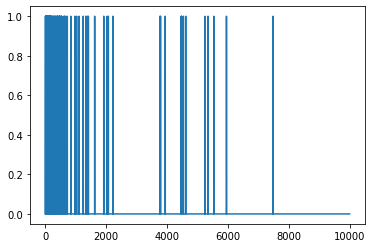

In [13]:
plt.plot(train_data[0])

In [14]:
baseline_model=keras.Sequential([
                                 keras.layers.Dense(16,activation='relu',input_shape=(NUM_WORDS,)),
                                 keras.layers.Dense(16,activation='relu'),
                                 keras.layers.Dense(1,activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [15]:
baseline_history=baseline_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data,test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5277 - accuracy: 0.7989 - binary_crossentropy: 0.5277 - val_loss: 0.3759 - val_accuracy: 0.8697 - val_binary_crossentropy: 0.3759
Epoch 2/20
25000/25000 - 2s - loss: 0.2815 - accuracy: 0.9019 - binary_crossentropy: 0.2815 - val_loss: 0.2915 - val_accuracy: 0.8856 - val_binary_crossentropy: 0.2915
Epoch 3/20
25000/25000 - 2s - loss: 0.2033 - accuracy: 0.9287 - binary_crossentropy: 0.2033 - val_loss: 0.2832 - val_accuracy: 0.8875 - val_binary_crossentropy: 0.2832
Epoch 4/20
25000/25000 - 2s - loss: 0.1632 - accuracy: 0.9443 - binary_crossentropy: 0.1632 - val_loss: 0.2979 - val_accuracy: 0.8825 - val_binary_crossentropy: 0.2979
Epoch 5/20
25000/25000 - 2s - loss: 0.1357 - accuracy: 0.9550 - binary_crossentropy: 0.1357 - val_loss: 0.3152 - val_accuracy: 0.8799 - val_binary_crossentropy: 0.3152
Epoch 6/20
25000/25000 - 2s - loss: 0.1163 - accuracy: 0.9626 - binary_crossentropy: 0.1163 - val_loss: 0.3447

In [16]:
smaller_model=keras.Sequential([
              keras.layers.Dense(4,activation='relu',input_shape=(NUM_WORDS,)),
              keras.layers.Dense(4,activation='relu'),
              keras.layers.Dense(1,activation='sigmoid')                 
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [18]:
smaller_history=smaller_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data,test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6244 - accuracy: 0.7662 - binary_crossentropy: 0.6244 - val_loss: 0.5215 - val_accuracy: 0.8555 - val_binary_crossentropy: 0.5215
Epoch 2/20
25000/25000 - 2s - loss: 0.4157 - accuracy: 0.8849 - binary_crossentropy: 0.4157 - val_loss: 0.3733 - val_accuracy: 0.8781 - val_binary_crossentropy: 0.3733
Epoch 3/20
25000/25000 - 2s - loss: 0.2950 - accuracy: 0.9103 - binary_crossentropy: 0.2950 - val_loss: 0.3134 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.3134
Epoch 4/20
25000/25000 - 2s - loss: 0.2367 - accuracy: 0.9248 - binary_crossentropy: 0.2367 - val_loss: 0.2907 - val_accuracy: 0.8891 - val_binary_crossentropy: 0.2907
Epoch 5/20
25000/25000 - 2s - loss: 0.2007 - accuracy: 0.9352 - binary_crossentropy: 0.2007 - val_loss: 0.2834 - val_accuracy: 0.8892 - val_binary_crossentropy: 0.2834
Epoch 6/20
25000/25000 - 2s - loss: 0.1762 - accuracy: 0.9418 - binary_crossentropy: 0.1762 - val_loss: 0.2854

In [20]:
bigger_model=keras.models.Sequential([
                                      keras.layers.Dense(512,activation='relu',input_shape=(NUM_WORDS,)),
                                      keras.layers.Dense(512,activation='relu'),
                                      keras.layers.Dense(1,activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [21]:
bigger_history=bigger_model.fit(train_data,train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data,test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.3574 - accuracy: 0.8392 - binary_crossentropy: 0.3574 - val_loss: 0.2947 - val_accuracy: 0.8800 - val_binary_crossentropy: 0.2947
Epoch 2/20
25000/25000 - 3s - loss: 0.1448 - accuracy: 0.9468 - binary_crossentropy: 0.1448 - val_loss: 0.3301 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.3301
Epoch 3/20
25000/25000 - 3s - loss: 0.0484 - accuracy: 0.9858 - binary_crossentropy: 0.0484 - val_loss: 0.4538 - val_accuracy: 0.8626 - val_binary_crossentropy: 0.4538
Epoch 4/20
25000/25000 - 3s - loss: 0.0105 - accuracy: 0.9981 - binary_crossentropy: 0.0105 - val_loss: 0.5620 - val_accuracy: 0.8704 - val_binary_crossentropy: 0.5620
Epoch 5/20
25000/25000 - 3s - loss: 0.0017 - accuracy: 1.0000 - binary_crossentropy: 0.0017 - val_loss: 0.6606 - val_accuracy: 0.8730 - val_binary_crossentropy: 0.6606
Epoch 6/20
25000/25000 - 3s - loss: 2.9704e-04 - accuracy: 1.0000 - binary_crossentropy: 2.9704e-04 - val_loss

In [0]:
def plot_history(histories,key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name,history in histories:
    val=plt.plot(history.epoch,history.history['val_'+key],
                 '--',label=name.title()+' Val')
    plt.plot(history.epoch,history.history[key],color=val[0].get_color(),
             label=name.title()+' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

    

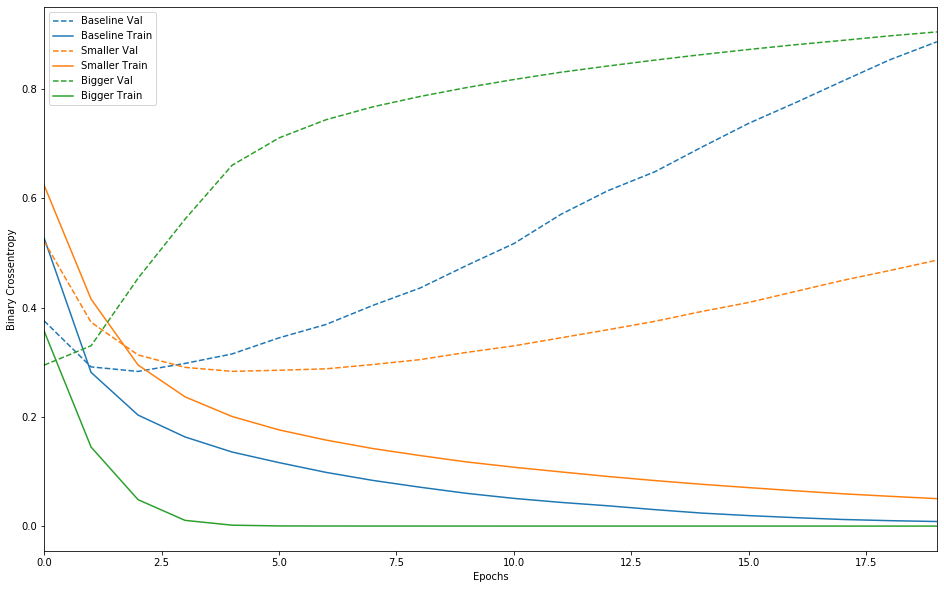

In [25]:
plot_history([('baseline',baseline_history),
                  ('smaller',smaller_history),
                  ('bigger',bigger_history)])

In [27]:
l2_model=keras.models.Sequential([
                                  keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                                                     activation='relu',input_shape=(NUM_WORDS,)),
                                  keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                                                     activation='relu'),
                                  keras.layers.Dense(1,activation='relu'),
                                  keras.layers.Dense(1,activation='sigmoid')
])
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])

l2_model_history=l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6030 - accuracy: 0.7584 - binary_crossentropy: 0.5683 - val_loss: 0.5281 - val_accuracy: 0.8684 - val_binary_crossentropy: 0.4950
Epoch 2/20
25000/25000 - 2s - loss: 0.4841 - accuracy: 0.8940 - binary_crossentropy: 0.4499 - val_loss: 0.5018 - val_accuracy: 0.8736 - val_binary_crossentropy: 0.4669
Epoch 3/20
25000/25000 - 3s - loss: 0.4494 - accuracy: 0.9160 - binary_crossentropy: 0.4137 - val_loss: 0.4926 - val_accuracy: 0.8786 - val_binary_crossentropy: 0.4562
Epoch 4/20
25000/25000 - 2s - loss: 0.4250 - accuracy: 0.9266 - binary_crossentropy: 0.3880 - val_loss: 0.4912 - val_accuracy: 0.8729 - val_binary_crossentropy: 0.4540
Epoch 5/20
25000/25000 - 2s - loss: 0.4046 - accuracy: 0.9376 - binary_crossentropy: 0.3672 - val_loss: 0.4912 - val_accuracy: 0.8712 - val_binary_crossentropy: 0.4536
Epoch 6/20
25000/25000 - 2s - loss: 0.3891 - accuracy: 0.9434 - binary_crossentropy: 0.3511 - val_loss: 0.4806

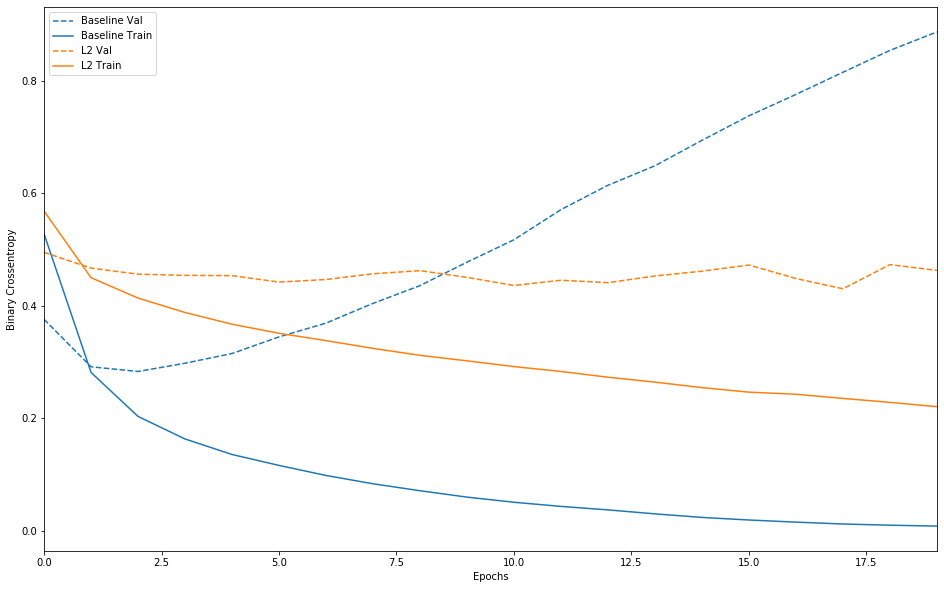

In [29]:
plot_history([('baseline',baseline_history),
              ('l2',l2_model_history)])

In [30]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6405 - accuracy: 0.6511 - binary_crossentropy: 0.6405 - val_loss: 0.5527 - val_accuracy: 0.7615 - val_binary_crossentropy: 0.5527
Epoch 2/20
25000/25000 - 2s - loss: 0.5192 - accuracy: 0.8292 - binary_crossentropy: 0.5192 - val_loss: 0.4696 - val_accuracy: 0.8686 - val_binary_crossentropy: 0.4696
Epoch 3/20
25000/25000 - 3s - loss: 0.4433 - accuracy: 0.8828 - binary_crossentropy: 0.4433 - val_loss: 0.4200 - val_accuracy: 0.8779 - val_binary_crossentropy: 0.4200
Epoch 4/20
25000/25000 - 2s - loss: 0.3831 - accuracy: 0.9054 - binary_crossentropy: 0.3831 - val_loss: 0.3878 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.3878
Epoch 5/20
25000/25000 - 2s - loss: 0.3269 - accuracy: 0.9219 - binary_crossentropy: 0.3269 - val_loss: 0.3727 - val_accuracy: 0.8827 - val_binary_crossentropy: 0.3727
Epoch 6/20
25000/25000 - 2s - loss: 0.2865 - accuracy: 0.9324 - binary_crossentropy: 0.2865 - val_loss: 0.3596

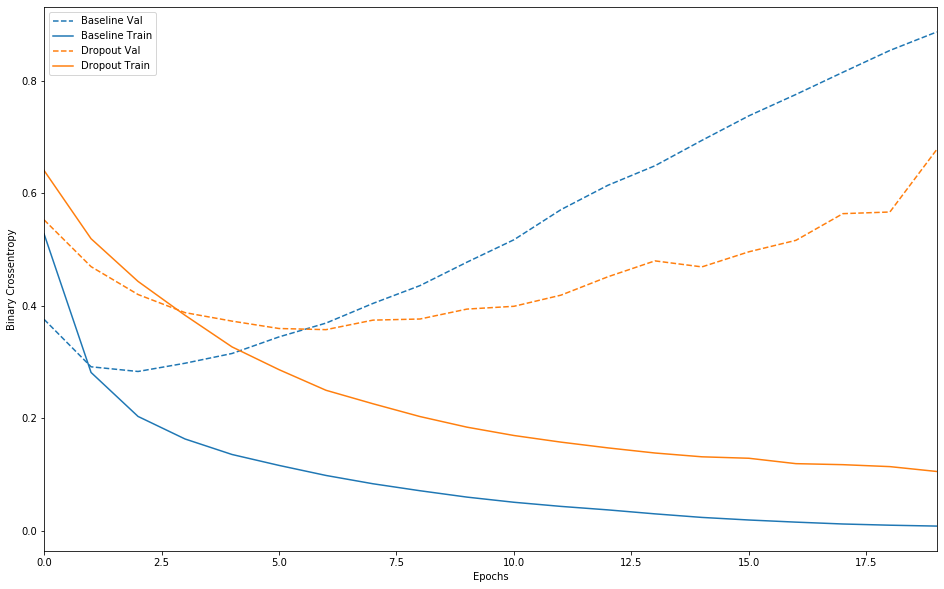

In [31]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])